# Random Forest

In [1]:
#combination of multiple decision trees
#rfc= mode(majority) of dt
#rfr= average or mean of dt
#slove the problem of overfiting
#bootsrap- replacement of datapoints
#bagging- agrregation of boostrap


In [ ]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder




In [3]:
iris= sns.load_dataset("iris")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
126,6.2,2.8,4.8,1.8,virginica
120,6.9,3.2,5.7,2.3,virginica
70,5.9,3.2,4.8,1.8,versicolor
135,7.7,3.0,6.1,2.3,virginica
19,5.1,3.8,1.5,0.3,setosa
96,5.7,2.9,4.2,1.3,versicolor
21,5.1,3.7,1.5,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa


In [4]:
X=iris.iloc[:,0:4]
y=iris.iloc[:,4]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10, 
                                                    train_size= 0.80, 
                                                    stratify=iris["species"])

In [6]:
y_test.value_counts()

species
versicolor    10
setosa        10
virginica     10
Name: count, dtype: int64

In [7]:
y_train.value_counts()

species
virginica     40
versicolor    40
setosa        40
Name: count, dtype: int64

In [8]:
le=LabelEncoder()
le

LabelEncoder()

In [9]:
y_train_enc=le.fit_transform(y_train)

In [10]:
y_test_enc= le.transform(y_test)

In [11]:
y_test_enc

array([1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 0, 1, 1])

In [12]:
dtc=RandomForestClassifier(max_depth=2)
dtc

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
dtc.fit(x_train, y_train_enc)

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
confusion_matrix(y_true=y_train_enc, y_pred=dtc.predict(x_train))

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

In [15]:
confusion_matrix(y_true=y_test_enc, y_pred=dtc.predict(x_test))

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [16]:
accuracy_score(y_true=y_train_enc, y_pred=dtc.predict(x_train)),
accuracy_score(y_true=y_test_enc, y_pred=dtc.predict(x_test))

1.0

In [17]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.7\ngini = 0.665\nsamples = 82\nvalue = [36, 41, 43]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [36, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 57\nvalue = [0, 41, 43]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.13\nsamples = 31\nvalue = [0, 40, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 26\nvalue = [0, 1, 40]')]

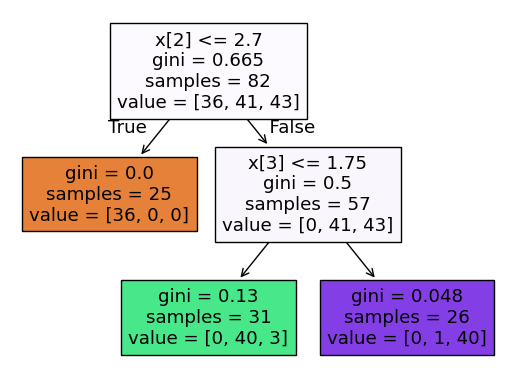

In [18]:
plot_tree(dtc.estimators_[1],filled=True)

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base learner (Decision Tree)
base_tree = DecisionTreeClassifier(random_state=42)

# Bagging with 50 decision trees
bagging_model = BaggingClassifier(estimator=base_tree,
                                  n_estimators=50,
                                  random_state=42)

# Train
bagging_model.fit(X_train, y_train)

# Predict
y_pred = bagging_model.predict(X_test)

# Accuracy
print("Bagging Accuracy:", accuracy_score(y_test, y_pred))


Bagging Accuracy: 1.0


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Weak learner (shallow Decision Tree)
base_tree = DecisionTreeClassifier(max_depth=1, random_state=42)

# AdaBoost with 50 weak learners
boosting_model = AdaBoostClassifier(estimator=base_tree,
                                    n_estimators=50,
                                    learning_rate=1.0,
                                    random_state=42)

# Train
boosting_model.fit(X_train, y_train)

# Predict
y_pred = boosting_model.predict(X_test)

# Accuracy
print("Boosting Accuracy:", accuracy_score(y_test, y_pred))


Boosting Accuracy: 1.0
